In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('results.csv')
df['trade_date'] = pd.to_datetime(df['Date'])


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('results.csv')
df['trade_date'] = pd.to_datetime(df['Date'])


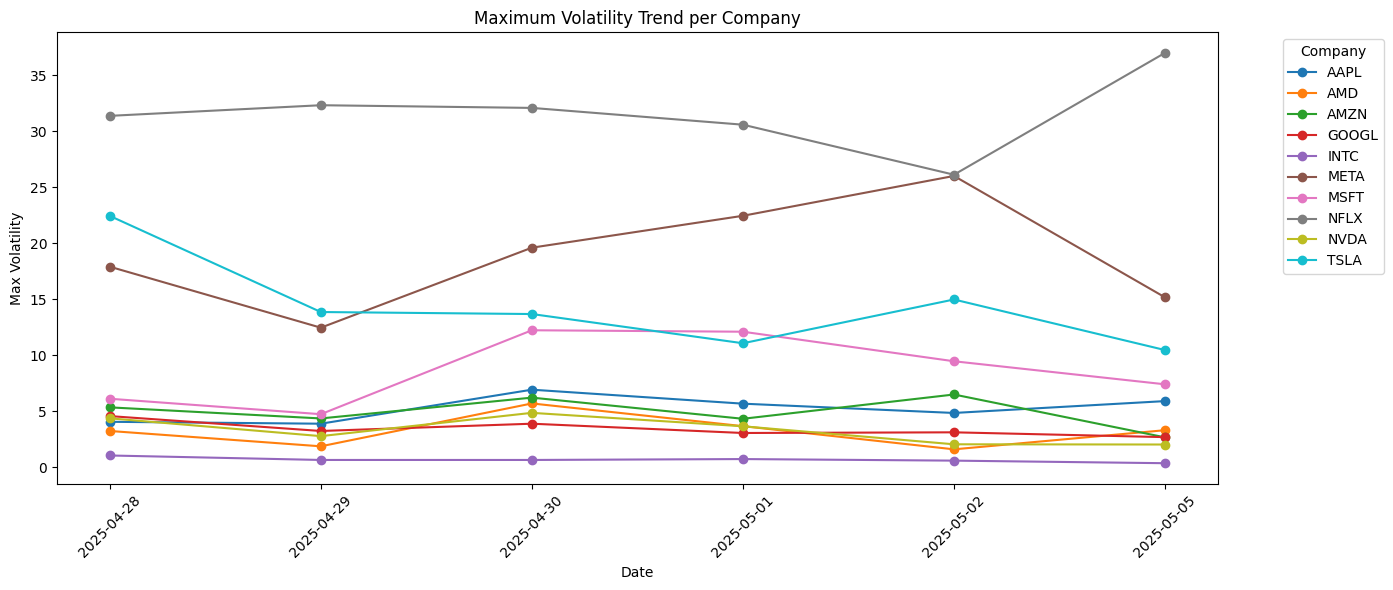

In [12]:
# Create the figure
plt.figure(figsize=(14, 6))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Max_Volatility'], marker='o', label=company)

plt.title('Maximum Volatility Trend per Company')
plt.xlabel('Date')
plt.ylabel('Max Volatility')
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [13]:
most_volatile = df.groupby('Company')['Max_Volatility'].mean().sort_values(ascending=False)
print("Most Volatile Company:\n", most_volatile.head(1))


Most Volatile Company:
 Company
NFLX    31.586667
Name: Max_Volatility, dtype: float64


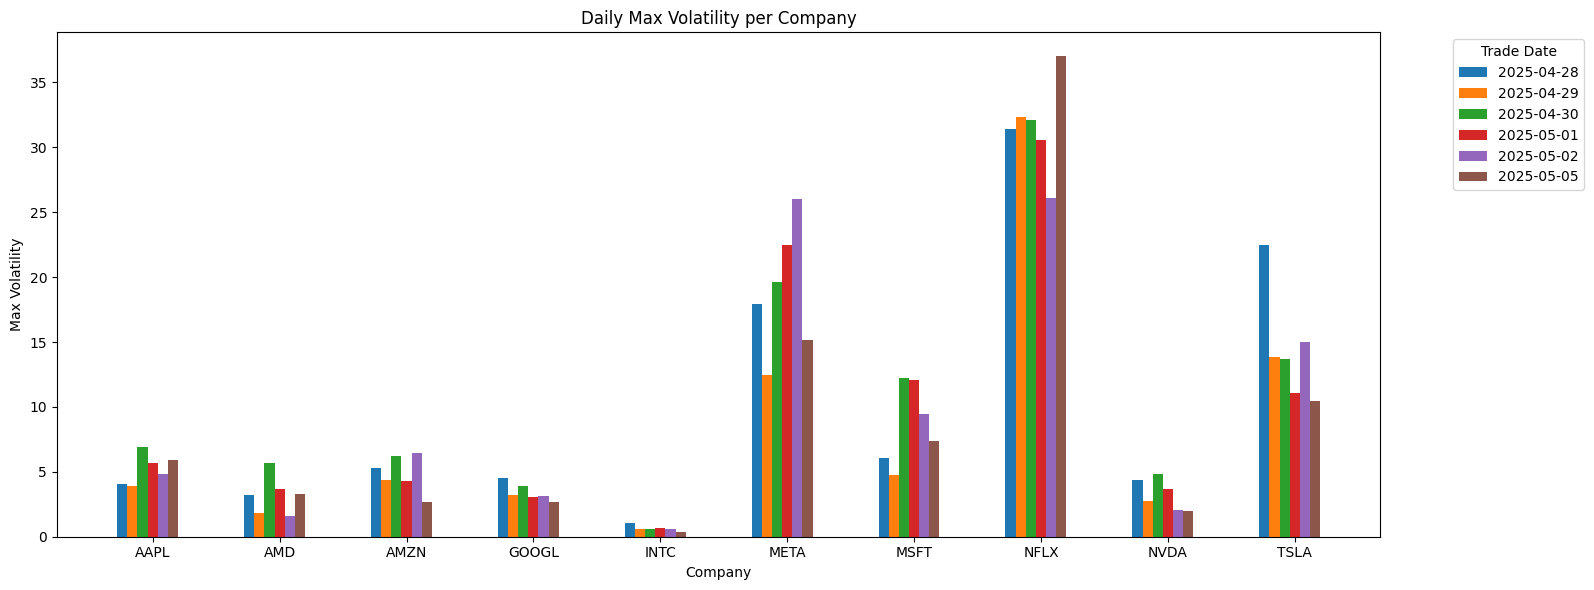

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Make sure trade_date is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Prepare data
companies = df['Company'].unique()
dates = sorted(df['Date'].dt.strftime('%Y-%m-%d').unique())
x = np.arange(len(companies))  # base positions for companies
width = 0.08  # width of each bar

plt.figure(figsize=(16, 6))

# Plot each day as a separate bar group
for i, date in enumerate(dates):
    day_data = df[df['Date'].dt.strftime('%Y-%m-%d') == date]
    heights = [day_data[day_data['Company'] == company]['Max_Volatility'].values[0] if company in day_data['Company'].values else 0 for company in companies]
    plt.bar(x + i*width, heights, width, label=date)

plt.title('Daily Max Volatility per Company')
plt.xlabel('Company')
plt.ylabel('Max Volatility')
plt.xticks(x + width * (len(dates)/2), companies)
plt.legend(title='Trade Date', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [16]:
print ("This supports my conclusion that NFLX is the most volatile")

This supports my conclusion that NFLX is the most volatile
